一些基本知识点：

1.做聚类之前一般要做归一化，因为很多聚类模型都是依据距离来计算的。但也有可能出现特殊情况，万一某个特征就是就重要呢...

2.聚类模型的评估方法
    
    常用轮廓系数：metrics.silhouette_score
    
    可利用轮廓系数进评估，初步调参，选轮廓系数最大的

3.DBSCAN对于不规整数据集比较强大，对于规整的小数据集可能还不如KMeans。DBSCAN可以找到离群点，labels=-1的为离群点

3.各种聚类模型：（Kmeans、层次聚类、DBSCAN的原理介绍在笔记本）

<img src="./img1.png" style="width:500px;height:350px;float:left">


In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
#import utilities
data=pd.read_csv(r'E:\BaiduDownload\Python-Machine-Learning-Cookbook-master\Chapter04\data_perf.csv')
data.head()

,m1,m2
0,1.65,1.91
1,2.77,4.98
2,5.82,2.56
3,7.24,5.24
4,-0.30,4.06


In [14]:
scores=[]
range_value=np.arange(2,10)
for i in range_value:
    kmeans = KMeans(init='k-means++',n_clusters=i,n_init=10)
    kmeans.fit(data)
    score = metrics.silhouette_score(data,kmeans.labels_,metric='euclidean',sample_size=len(data))
    print('n_cluster:',i)
    print('score:',score)


n_cluster: 2
score: 0.5290397175472954
n_cluster: 3
score: 0.5572466391184154
n_cluster: 4
score: 0.5832757517829593
n_cluster: 5
score: 0.6582796909760833
n_cluster: 6
score: 0.5788314929442077
n_cluster: 7
score: 0.5319509208451675
n_cluster: 8
score: 0.45817868081414564
n_cluster: 9
score: 0.47853038159539774


0.6582796909760834


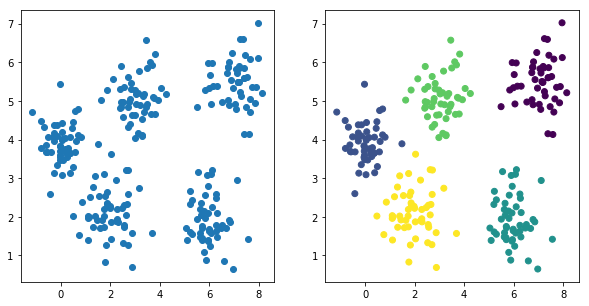

In [27]:
#聚类成5个集群是最好的，实际图形如下图
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(data.iloc[:,0],data.iloc[:,1])
#data.iloc[:,0]
km = KMeans(n_clusters=5,n_init=10)
km.fit(data)
ax[1].scatter(data.iloc[:,0],data.iloc[:,1],c=km.labels_)
print(metrics.silhouette_score(data,km.labels_))

0.6565778425336227


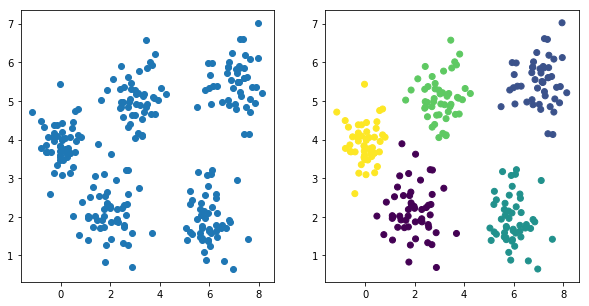

In [29]:
#凝聚层次聚类
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(linkage='ward',connectivity=None,n_clusters=5)
model.fit(data)
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(data.iloc[:,0],data.iloc[:,1])
ax[1].scatter(data.iloc[:,0],data.iloc[:,1],c=model.labels_)
print(metrics.silhouette_score(data,model.labels_))

epsilon: 0.3 ,score: 0.12865164017329447
epsilon: 0.39999999999999997 ,score: 0.3593618148137507
epsilon: 0.5 ,score: 0.5134143263329636
epsilon: 0.6 ,score: 0.616532168834258
epsilon: 0.7 ,score: 0.6321600450689241
epsilon: 0.7999999999999999 ,score: 0.6366395861050828
epsilon: 0.8999999999999999 ,score: 0.514167895613453
epsilon: 1.0 ,score: 0.5629298661962946
epsilon: 1.0999999999999999 ,score: 0.5629298661962946
epsilon: 1.2 ,score: 0.5629298661962946


<BarContainer object of 10 artists>

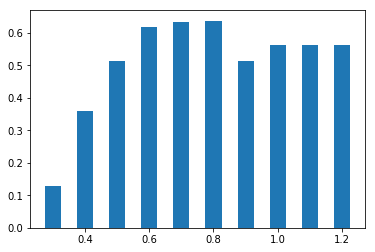

In [39]:
#DBSCAN
from sklearn.cluster import DBSCAN
#先找出最佳集群数量参数
eps_grid = np.linspace(0.3,1.2,num=10)
silhouette_scores=[]
eps_best = eps_grid[0]
silhouette_scores_max=-1
model_best=None
label_best=None
for eps in eps_grid:
    model = DBSCAN(eps,min_samples=5).fit(data)
    labels = model.labels_
    silhouette_score=metrics.silhouette_score(data,labels)
    silhouette_scores.append(silhouette_score)
    print("epsilon:",eps,",score:",silhouette_score)
    if silhouette_score>silhouette_scores_max:
        silhouette_scores_max=silhouette_score
        eps_best=eps
        model_best=model
        label_best=labels

plt.bar(eps_grid,silhouette_scores,width=0.05)

In [45]:
model = model_best
labels=label_best
print(silhouette_scores_max)#对于普通标准数据集，DBSCAN可能还不如KMeans等
print(labels)

0.6366395861050828
[ 0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3
  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2
  3  4 -1  1  2  3  4  0  1  2  3  4  0  0  2  3  4  0  1  2  3  4  0  1
  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0
  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3
  0  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1 -1  3 -1  0  1 -1
  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1
  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0
  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4]


In [44]:
#DBSCAN算法擅长找离群点，labels=-1表示离群点,所以labels的集合中减去-1求出集群数
offset=0
if -1 in labels:
    offset =1 
num_clusters=len(set(labels))-offset
print('num_clusters:',num_clusters)

num_clusters: 5


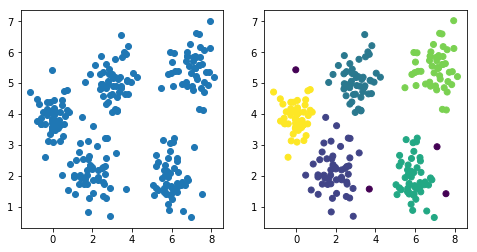

In [51]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(data.iloc[:,0],data.iloc[:,1])
ax[1].scatter(data.iloc[:,0],data.iloc[:,1],c=labels)#紫色的为离群点

[4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2
 1 3 0 4 2 1 3 0 4 2 1 5 0 4 2 1 3 0 4 2 1 3 0 4 4 1 3 0 4 2 1 3 0 4 2 1 3
 0 4 2 1 3 0 4 2 1 3 0 4 2 5 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4
 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1
 3 0 4 2 1 3 0 4 2 1 3 0 4 2 5 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0
 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2
 1 3 0 4 2 1 5 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0 4 2 1 3 0]
6
[[0.02511628 3.83511628]
 [5.91230769 1.85794872]
 [3.04289474 4.885     ]
 [7.17028571 5.46914286]
 [1.90857143 2.11114286]
 [7.35666667 3.74      ]]
0.5786781373659824


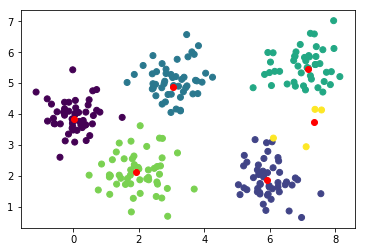

In [71]:
#均值漂移聚类
from sklearn.cluster import MeanShift,estimate_bandwidth
bandwidth = estimate_bandwidth(data,quantile=0.1)
meanshift_estimator = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift_estimator.fit(data)
labels = meanshift_estimator.labels_
centroids = meanshift_estimator.cluster_centers_
num_clusters = len(np.unique(labels))
print(labels)
print(num_clusters)
print(centroids)
print(metrics.silhouette_score(data,labels))
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=labels)
for i in np.arange(len(centroids)):
    centroid=centroids[i]
    plt.scatter(centroid[0],centroid[1],c='red')